In [1]:
import numpy as np             # Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
Fraud = pd.read_csv("Fraud_check.csv")  # Loading Data
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


### Data Understanding

In [3]:
Fraud.shape

(600, 6)

In [4]:
Fraud.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [5]:
Fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
Fraud['Undergrad'] = Fraud['Undergrad'].astype('category')      # Changing Dtype from object to category
Fraud['Marital.Status'] = Fraud['Marital.Status'].astype('category')
Fraud['Urban'] = Fraud['Urban'].astype('category')

In [7]:
Fraud.dtypes

Undergrad          category
Marital.Status     category
Taxable.Income        int64
City.Population       int64
Work.Experience       int64
Urban              category
dtype: object

### Data Preparation

In [8]:
label_encoder = preprocessing.LabelEncoder()
Fraud['Undergrad']= label_encoder.fit_transform(Fraud['Undergrad']) 
Fraud['Marital.Status']= label_encoder.fit_transform(Fraud['Marital.Status']) 
Fraud['Urban']= label_encoder.fit_transform(Fraud['Urban']) 

In [9]:
Fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [10]:
Fraud['Taxable.Income'] = Fraud['Taxable.Income'].map(lambda x:'risky' if x<30000 else 'good')

In [11]:
Fraud['Taxable.Income'] = label_encoder.fit_transform(Fraud['Taxable.Income'])

### Data Visualization

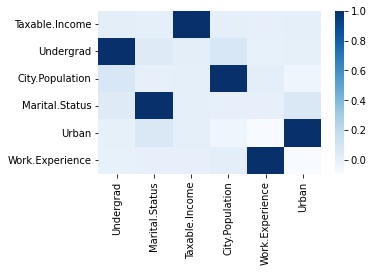

In [12]:
corr = Fraud.corr().sort_values(by='Taxable.Income', ascending = False)   # Correlation 
plt.figure(figsize = (5,3))
sns.heatmap(corr,cmap = 'Blues');

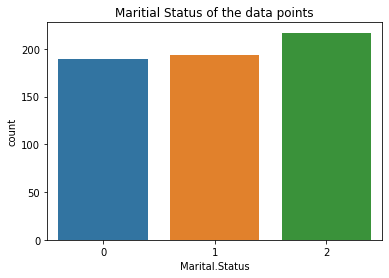

In [13]:
plt.title("Maritial Status of the data points")
sns.countplot(Fraud['Marital.Status'])
plt.show()

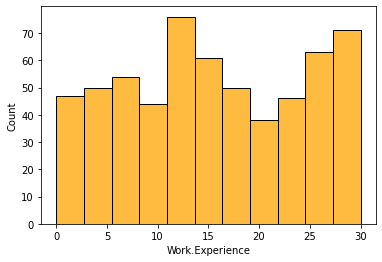

In [14]:
sns.histplot(Fraud['Work.Experience'],color='orange');

<AxesSubplot:xlabel='City.Population', ylabel='Density'>

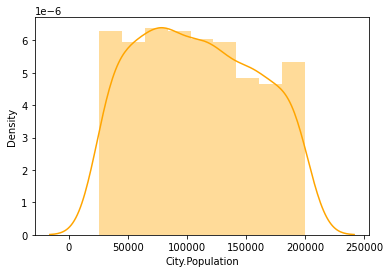

In [15]:
sns.distplot(Fraud['City.Population'],color='orange')

### Model Building

In [16]:
X = Fraud.drop("Taxable.Income",axis=1)  
y = Fraud['Taxable.Income']

In [17]:
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [18]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: Taxable.Income, Length: 600, dtype: int32

### Test Train Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 12)

In [20]:
X_train.shape, y_train.shape

((480, 5), (480,))

In [21]:
X_test.shape, y_test.shape

((120, 5), (120,))

### Model Training

In [22]:
rf_model = RandomForestClassifier(n_estimators = 100, max_depth = 5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [23]:
rf_model = RandomForestClassifier(n_estimators = 100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

### Model Testing

In [24]:
y_train_pred = rf_model.predict(X_train) 

In [25]:
y_test_pred = rf_model.predict(X_test)

In [26]:
accuracy_score(y_train, y_train_pred)

1.0

In [27]:
confusion_matrix(y_train, y_train_pred)

array([[369,   0],
       [  0, 111]], dtype=int64)

In [28]:
precision_score(y_train, y_train_pred)

1.0

In [29]:
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       369
           1       1.00      1.00      1.00       111

    accuracy                           1.00       480
   macro avg       1.00      1.00      1.00       480
weighted avg       1.00      1.00      1.00       480



1.0


Text(0, 0.5, 'True Positive Rate')

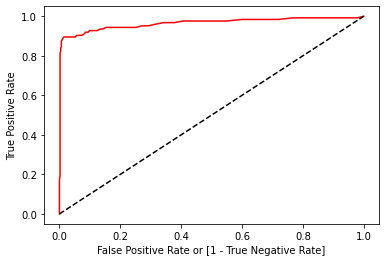

In [30]:
fpr, tpr, thresholds = roc_curve(y, rf_model.predict_proba (X)[:,1])
auc = roc_auc_score(y_train, y_train_pred)
print(auc)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color ='red', label = 'logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

### Testing Data

In [31]:
accuracy_score(y_test,y_test_pred)

0.7666666666666667

In [32]:
confusion_matrix(y_test,y_test_pred)

array([[92, 15],
       [13,  0]], dtype=int64)

In [33]:
precision_score(y_test,y_test_pred)

0.0

In [34]:
recall_score(y_test,y_test_pred)

0.0